In [1]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
product = pd.read_csv("/kaggle/input/database2-tp/product2.csv", sep=";",encoding="latin1")


In [3]:
package = pd.read_csv("/kaggle/input/database2-tp/Package2.csv", sep=";",encoding="latin1")


# 1. Auscultation des données

a) pour la Table product

In [4]:
product.shape

(93238, 20)

In [6]:
product.keys()

Index(['PRODUCTID', 'PRODUCTNDC', 'PRODUCTTYPENAME', 'PROPRIETARYNAME',
       'PROPRIETARYNAMESUFFIX', 'NONPROPRIETARYNAME', 'DOSAGEFORMNAME',
       'ROUTENAME', 'STARTMARKETINGDATE', 'ENDMARKETINGDATE',
       'MARKETINGCATEGORYNAME', 'APPLICATIONNUMBER', 'LABELERNAME',
       'SUBSTANCENAME', 'ACTIVE_NUMERATOR_STRENGTH', 'ACTIVE_INGRED_UNIT',
       'PHARM_CLASSES', 'DEASCHEDULE', 'NDC_EXCLUDE_FLAG',
       'LISTING_RECORD_CERTIFIED_THROUGH'],
      dtype='object')

In [7]:
nbuniques = product.nunique()
nbmanquants = product.isnull().sum()
pd.DataFrame({'Types': product[:].dtypes,'Nb_Uniques': nbuniques,'Nb_manquants': nbmanquants})

,Types,Nb_Uniques,Nb_manquants
PRODUCTID,object,91678,1560
PRODUCTNDC,object,91468,0
PRODUCTTYPENAME,object,7,0
PROPRIETARYNAME,object,32716,6
PROPRIETARYNAMESUFFIX,object,4022,83075
NONPROPRIETARYNAME,object,16257,4
DOSAGEFORMNAME,object,134,0
ROUTENAME,object,180,1932
STARTMARKETINGDATE,int64,7262,0
ENDMARKETINGDATE,float64,742,88915


In [8]:
nb_m = product.isnull().sum().sort_values()
ratio_m = (product.isnull().sum()/product.shape[0]).sort_values()
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)
pd.DataFrame({'Types': product[list(manquant.index.values)].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})

,Types,Nb manquants,Ratio manquants%
PRODUCTNDC,object,0,0.000000
PRODUCTTYPENAME,object,0,0.000000
DOSAGEFORMNAME,object,0,0.000000
STARTMARKETINGDATE,int64,0,0.000000
NDC_EXCLUDE_FLAG,object,0,0.000000
MARKETINGCATEGORYNAME,object,0,0.000000
LABELERNAME,object,0,0.000000
NONPROPRIETARYNAME,object,4,0.000043
PROPRIETARYNAME,object,6,0.000064
PRODUCTID,object,1560,0.016731


In [9]:
product.loc[product['STARTMARKETINGDATE'] > product['ENDMARKETINGDATE']]

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC_EXCLUDE_FLAG,LISTING_RECORD_CERTIFIED_THROUGH


In [11]:
package.shape

(173887, 8)

In [12]:
package.head(20)

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,STARTMARKETINGDATE,ENDMARKETINGDATE,NDC_EXCLUDE_FLAG,SAMPLE_PACKAGE
0,0002-0800_94c48759-29bb-402d-afff-9a713be11f0e,0002-0800,0002-0800-01,1 VIAL in 1 CARTON (0002-0800-01) > 10 mL in ...,19870710,NaN,N,N
1,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",20120601,NaN,N,N
2,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",20120601,NaN,N,N
3,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,20141107,NaN,N,Y
4,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,20141107,NaN,N,N
5,0002-1434_42a80046-fd68-4b80-819c-a443b7816edb,0002-1434,0002-1434-61,2 SYRINGE in 1 CARTON (0002-1434-61) > .5 mL ...,20141107,NaN,N,Y
6,0002-1434_42a80046-fd68-4b80-819c-a443b7816edb,0002-1434,0002-1434-80,4 SYRINGE in 1 CARTON (0002-1434-80) > .5 mL ...,20141107,NaN,N,N
7,0002-1436_dd7f66eb-66e1-4ad0-a593-417dbf2c74e2,0002-1436,0002-1436-11,1 SYRINGE in 1 CARTON (0002-1436-11) > 1 mL i...,20180927,NaN,N,N
8,0002-1436_dd7f66eb-66e1-4ad0-a593-417dbf2c74e2,0002-1436,0002-1436-61,2 SYRINGE in 1 CARTON (0002-1436-61) > 1 mL i...,20180927,NaN,N,Y
9,0002-1445_05ca6b40-080f-4d27-930c-9bbdc0d06afa,0002-1445,0002-1445-09,3 SYRINGE in 1 CARTON (0002-1445-09) > 1 mL i...,20160322,NaN,N,N


In [13]:
package.keys()


Index(['PRODUCTID', 'PRODUCTNDC', 'NDCPACKAGECODE', 'PACKAGEDESCRIPTION',
       'STARTMARKETINGDATE', 'ENDMARKETINGDATE', 'NDC_EXCLUDE_FLAG',
       'SAMPLE_PACKAGE'],
      dtype='object')

In [14]:
nbuniques = package.nunique()
nbmanquants = package.isnull().sum()
pd.DataFrame({'Types': package[:].dtypes,'Nb_Uniques': nbuniques,'Nb_manquants': nbmanquants})

,Types,Nb_Uniques,Nb_manquants
PRODUCTID,object,93084,0
PRODUCTNDC,object,91080,1500
NDCPACKAGECODE,object,171447,2346
PACKAGEDESCRIPTION,object,173885,0
STARTMARKETINGDATE,int64,7401,0
ENDMARKETINGDATE,float64,767,167431
NDC_EXCLUDE_FLAG,object,1,0
SAMPLE_PACKAGE,object,2,0


In [15]:
nb_m = package.isnull().sum().sort_values()
ratio_m = (package.isnull().sum()/package.shape[0]).sort_values()
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)
pd.DataFrame({'Types': package[list(manquant.index.values)].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})

,Types,Nb manquants,Ratio manquants%
PRODUCTID,object,0,0.000000
PACKAGEDESCRIPTION,object,0,0.000000
STARTMARKETINGDATE,int64,0,0.000000
NDC_EXCLUDE_FLAG,object,0,0.000000
SAMPLE_PACKAGE,object,0,0.000000
PRODUCTNDC,object,1500,0.008626
NDCPACKAGECODE,object,2346,0.013492
ENDMARKETINGDATE,float64,167431,0.962872


# 2) Listons les relations/regles entres les attributs 

# 3)Détectons  et corrigeons les incohérences entre des valeurs d’attributs dans les deux tables

In [16]:
product["ENDMARKETINGDATE"].fillna(0, inplace=True)
product["DEASCHEDULE"].fillna("", inplace=True)
product["PROPRIETARYNAMESUFFIX"].fillna("",inplace = True)

In [17]:
mask = product["PRODUCTID"].notna() & (product["PRODUCTID"].str.split("_", n=1, expand=True)[0] != product["PRODUCTNDC"])
error = product.index[mask].values
print(len(error))
print(error)

513
[  159   160   310   311   312   313   314   315   316   317   318   319
   320 44170 44171 44172 44173 44174 44175 44176 44177 44178 44179 44180
 44181 44182 44183 44184 44185 44186 44187 44188 44189 44190 44191 44192
 44193 44194 44195 44196 44197 44198 44199 44200 44201 44202 44203 44204
 44205 44206 44207 44208 44209 44210 44211 44212 44213 44214 44215 44216
 44217 44218 44219 44220 44221 44222 44223 44224 44225 44226 44227 44228
 44229 44230 44231 44232 44233 44234 44235 44236 44237 44238 44239 44240
 44241 44242 44243 44244 44245 44246 44247 44248 44249 44250 44251 44252
 44253 44254 44255 44256 44257 44258 44259 44260 44261 44262 44263 44264
 44265 44266 44267 44268 44269 44270 44271 44272 44273 44274 44275 44276
 44277 44278 44279 44280 44281 44282 44283 44284 44285 44286 44287 44288
 44289 44290 44291 44292 44293 44294 44295 44296 44297 44298 44299 44300
 44301 44302 44303 44304 44305 44306 44307 44308 44309 44310 44311 44312
 44313 44314 44315 44316 44317 44318 44319 4432

In [18]:
product.loc[mask, "PRODUCTNDC"] = product.loc[mask, "PRODUCTID"].str.split("_", n=1, expand=True)[0]


In [19]:
package["ENDMARKETINGDATE"].fillna(0,inplace =True)

In [20]:
mask = package["PRODUCTID"].notna() & (package["PRODUCTID"].str.split("_", expand=True)[0] != package["PRODUCTNDC"])
error = package[mask].index.tolist()
print(len(error))
print(error)



2019
[228, 229, 230, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 26357, 26358, 26359, 26360, 26361, 26362, 26363, 26364, 26365, 26366, 26367, 26368, 26369, 26370, 26371, 26372, 26373, 26374, 26375, 26376, 26377, 26378, 26379, 26380, 26381, 26382, 26383, 26384, 26385, 26386, 26387, 26388, 26389, 26390, 26391, 26392, 26393, 26394, 26395, 26396, 26397, 26398, 26399, 26400, 26401, 26402, 26403, 26404, 26405, 26406, 26407, 26408, 26409, 26410, 26411, 26412, 26413, 26414, 26415, 26416, 26417, 26418, 26419, 26420, 26421, 26422, 26423, 26424, 26425, 26426, 26427, 26428, 26429, 26430, 26431, 26432, 26433, 26434, 26435, 26436, 26437, 26438, 26439, 26440, 26441, 26442, 26443, 26444, 26445, 26446, 26447, 26448, 26449, 26450, 26451, 26452, 26453, 26454, 26455, 26456, 26457, 26458, 26459, 26460, 26461, 26462, 26463, 26464, 26465, 26466, 26467, 26468, 26469, 26470, 26471, 26472, 26473, 26474, 26475, 26476, 26477, 26478, 26479, 26480, 26481, 26482, 26483, 26484, 264

In [21]:
package["PRODUCTNDC"] = np.where(
    np.logical_and(package["PRODUCTID"].notna(), 
                   package["PRODUCTID"].str.split("_", expand = True)[0] != package["PRODUCTNDC"]),
    package["PRODUCTID"].str.split("_", expand = True)[0],package["PRODUCTNDC"])

In [22]:
#- PRODUCTNDC inclus dans PRODUCTID 
# Sélection  des cas

mask = package["NDCPACKAGECODE"].notna() & (package["NDCPACKAGECODE"].str[:9] != package["PRODUCTNDC"].str[:9])
error = package[mask].index.tolist()
print(len(error))
print(error)


155
[6913, 40965, 40966, 40967, 40971, 40972, 40974, 40980, 40981, 40982, 41002, 41003, 41004, 41014, 41020, 41031, 41032, 41033, 41034, 41035, 41041, 41060, 41061, 41062, 41064, 41069, 41078, 41079, 41080, 41081, 41082, 41090, 41096, 41100, 41101, 41102, 41103, 41104, 41123, 41124, 41125, 41126, 41127, 41128, 41140, 41154, 41155, 41174, 41175, 41180, 41188, 41193, 41194, 41195, 41196, 41197, 41208, 41217, 41218, 41233, 41234, 41281, 41319, 41320, 41321, 41322, 41323, 41324, 41328, 41341, 41342, 41372, 41391, 41392, 41396, 41402, 41406, 41408, 41412, 41413, 41416, 41417, 41418, 41419, 41422, 41423, 41424, 41425, 41426, 41427, 41428, 41429, 41449, 41450, 41451, 41457, 41458, 41461, 41463, 41465, 41466, 41467, 41468, 41469, 41470, 41471, 41499, 41508, 41509, 41510, 41511, 41512, 41513, 41516, 41521, 41522, 41523, 41525, 41526, 41527, 41538, 41544, 41545, 41546, 41561, 41580, 41660, 41674, 41780, 41781, 41782, 41783, 41784, 41819, 41837, 41845, 41849, 41854, 41856, 41857, 41869, 41874, 41

In [23]:
mask = package["NDCPACKAGECODE"].notna() & (package["NDCPACKAGECODE"].str[:9] != package["PRODUCTNDC"].str[:9])
package.loc[mask, "NDCPACKAGECODE"] = package.loc[mask, "PRODUCTNDC"]


In [24]:
# Sélection  des cas
mask = package["PACKAGEDESCRIPTION"].notna() & (package["PACKAGEDESCRIPTION"].str.split(")", expand=True)[0].str.split("(", expand=True)[1] != package["NDCPACKAGECODE"])
error = package[mask].index.tolist()
print(len(error))
print(error[:50])

2508
[6913, 34557, 34558, 34559, 34560, 34561, 34562, 34563, 34564, 34565, 34566, 34567, 34568, 34569, 34570, 34571, 34572, 34573, 34574, 34575, 34576, 34577, 34578, 34579, 34580, 34581, 34582, 34583, 34584, 34585, 34586, 34587, 34588, 34589, 34590, 34591, 34592, 34593, 34594, 34595, 34596, 34597, 34598, 34599, 34600, 34601, 34602, 34603, 34604, 34605]


In [25]:
mask = package["PACKAGEDESCRIPTION"].notna() & (package["PACKAGEDESCRIPTION"].str.split(")", expand=True)[0].str.split("(", expand=True)[1] != package["NDCPACKAGECODE"])
package.loc[mask, "NDCPACKAGECODE"] = package.loc[mask, "PACKAGEDESCRIPTION"].str.split(")", expand=True)[0].str.split("(", expand=True)[1]


# 5)Détections et retrait des objets dupliqués dans les deux tables 

In [26]:
produit_epure = product.drop(['PRODUCTID', 'PRODUCTNDC'], axis=1)
print(produit_epure.duplicated().sum(), "objet dupliqués")


4030 objet dupliqués


In [27]:
product = product.drop_duplicates(subset=list(set(product.columns) - {'PRODUCTID', 'PRODUCTNDC'}), keep='first')
produit_epure = product.drop(['PRODUCTID', 'PRODUCTNDC'], axis=1)
print(produit_epure.duplicated().sum(), "objets duppliqués apres épuration")


0 objets duppliqués apres épuration


In [28]:
print(package["NDCPACKAGECODE"].duplicated().sum(), "objet dupliqués")

2 objet dupliqués


In [29]:
package = package.drop_duplicates(subset=["NDCPACKAGECODE"], keep="first")
print(package["NDCPACKAGECODE"].duplicated().sum(), "objets duppliqués apres épuration")


0 objets duppliqués apres épuration


# 6)Fusion  des deux tables et nettoyage 

In [30]:
data = pd.merge(product, package, how='inner', on='PRODUCTID')


In [31]:
data.shape

(164953, 27)

In [32]:
data.keys()

Index(['PRODUCTID', 'PRODUCTNDC_x', 'PRODUCTTYPENAME', 'PROPRIETARYNAME',
       'PROPRIETARYNAMESUFFIX', 'NONPROPRIETARYNAME', 'DOSAGEFORMNAME',
       'ROUTENAME', 'STARTMARKETINGDATE_x', 'ENDMARKETINGDATE_x',
       'MARKETINGCATEGORYNAME', 'APPLICATIONNUMBER', 'LABELERNAME',
       'SUBSTANCENAME', 'ACTIVE_NUMERATOR_STRENGTH', 'ACTIVE_INGRED_UNIT',
       'PHARM_CLASSES', 'DEASCHEDULE', 'NDC_EXCLUDE_FLAG_x',
       'LISTING_RECORD_CERTIFIED_THROUGH', 'PRODUCTNDC_y', 'NDCPACKAGECODE',
       'PACKAGEDESCRIPTION', 'STARTMARKETINGDATE_y', 'ENDMARKETINGDATE_y',
       'NDC_EXCLUDE_FLAG_y', 'SAMPLE_PACKAGE'],
      dtype='object')

## __Verification du nettoyage__

In [33]:
incoherence = data.loc[data["PRODUCTNDC_x"].notna() & (data["PRODUCTNDC_x"] != data["PRODUCTNDC_y"]), "PRODUCTNDC_x"]
print(sum(incoherence.notna()), "valeurs incohérentes")

0 valeurs incohérentes


In [34]:
data = data.drop(["PRODUCTNDC_x","PRODUCTNDC_y"], axis=1)

In [35]:
data.head()

,PRODUCTID,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE_x,ENDMARKETINGDATE_x,MARKETINGCATEGORYNAME,...,PHARM_CLASSES,DEASCHEDULE,NDC_EXCLUDE_FLAG_x,LISTING_RECORD_CERTIFIED_THROUGH,NDCPACKAGECODE,PACKAGEDESCRIPTION,STARTMARKETINGDATE_y,ENDMARKETINGDATE_y,NDC_EXCLUDE_FLAG_y,SAMPLE_PACKAGE
0,0002-3251_67a53369-eead-4f2c-afe9-f3274899c47e,HUMAN PRESCRIPTION DRUG,Strattera,,Atomoxetine hydrochloride,CAPSULE,ORAL,20050214,0.0,NDA,...,"Norepinephrine Reuptake Inhibitor [EPC],Norepi...",,N,20211231.0,0002-3251-30,30 CAPSULE in 1 BOTTLE (0002-3251-30),20050824,0.0,N,N
1,0002-3270_06e2a1f2-459c-45aa-9341-54e36f7726a7,HUMAN PRESCRIPTION DRUG,Cymbalta,,Duloxetine hydrochloride,"CAPSULE, DELAYED RELEASE",ORAL,20100115,0.0,NDA,...,"Norepinephrine Uptake Inhibitors [MoA],Seroton...",,N,20201231.0,0002-3270-04,"1000 CAPSULE, DELAYED RELEASE in 1 BOTTLE (000...",20100115,0.0,N,N
2,0002-3270_06e2a1f2-459c-45aa-9341-54e36f7726a7,HUMAN PRESCRIPTION DRUG,Cymbalta,,Duloxetine hydrochloride,"CAPSULE, DELAYED RELEASE",ORAL,20100115,0.0,NDA,...,"Norepinephrine Uptake Inhibitors [MoA],Seroton...",,N,20201231.0,0002-3270-30,"30 CAPSULE, DELAYED RELEASE in 1 BOTTLE (0002-...",20100115,0.0,N,N
3,0002-4112_d561034d-ea58-45fe-9d07-2e9eba98c2e4,HUMAN PRESCRIPTION DRUG,Zyprexa,,Olanzapine,TABLET,ORAL,19970623,0.0,NDA,...,Atypical Antipsychotic [EPC],,N,20201231.0,0002-4112-30,30 TABLET in 1 BOTTLE (0002-4112-30),29970623,0.0,N,N
4,0002-4115_d561034d-ea58-45fe-9d07-2e9eba98c2e4,HUMAN PRESCRIPTION DRUG,Zyprexa,,Olanzapine,TABLET,ORAL,19961001,0.0,NDA,...,Atypical Antipsychotic [EPC],,N,20201231.0,0002-4115-30,30 TABLET in 1 BOTTLE (0002-4115-30),19961001,0.0,N,N


In [65]:
def extract_attributes(row):
    # Créer un dictionnaire vide pour stocker les attributs extraits
    attributes = {'EPC': None, 'CS': None, 'MOA': None, 'PE': None}
    
    # Diviser la chaîne en une liste d'éléments
    elements = row.strip('[]').split(',')
    
    # Parcourir chaque élément et extraire l'attribut correspondant
    for element in elements:
        if 'EPC' in element:
            attributes['EPC'] = element.split()[0]
        elif 'CS' in element:
            attributes['CS'] = element.split()[0]
        elif 'MoA' in element:
            attributes['MOA'] = element.split()[0]
        elif 'PE' in element:
            attributes['PE'] = element.split()[0]
    
    # Retourner le dictionnaire d'attributs extraits
    return attributes


In [66]:
data[['EPC', 'CS', 'MOA', 'PE']] = data['PHARM_CLASSES'].apply(lambda x: pd.Series(extract_attributes(x)) if pd.notnull(x) else pd.Series({'EPC': None, 'CS': None, 'MOA': None, 'PE': None}))

In [125]:
#Division de la base de données en target variable et features pour un prétraitement sur les features
y = data["EPC"]
X = data.drop("EPC", axis = 1)

In [126]:
#Selection des colonnes catégorielles 
cat_cols = [col for col in X.select_dtypes(include = "object")]

In [127]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
le = LabelEncoder()

# Encoder chaque colonne de l'ensemble cat_cols
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [128]:
#Standardisons l'ensemble de données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in X.columns:
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [129]:
#Remplacons les valeurs manquantes par 0
X.fillna(0, inplace=True)

In [130]:
from sklearn.decomposition import PCA

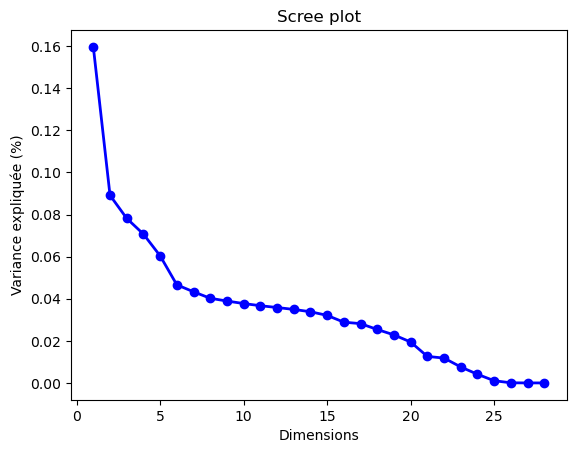

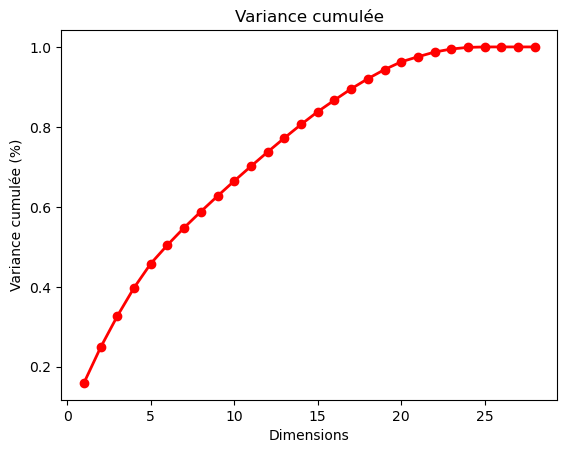

Nombre de dimensions idéal :  14


In [131]:
pca.fit(X)

# Plot des valeurs propres
plt.plot(np.arange(1, pca.n_components_+1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree plot')
plt.xlabel('Dimensions')
plt.ylabel('Variance expliquée (%)')
plt.show()

# Calcul de la variance cumulée
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot de la variance cumulée
plt.plot(np.arange(1, pca.n_components_+1), cumulative_variance_ratio, 'ro-', linewidth=2)
plt.title('Variance cumulée')
plt.xlabel('Dimensions')
plt.ylabel('Variance cumulée (%)')
plt.show()

# Sélection du nombre de dimensions idéal (par exemple, 80% de la variance expliquée)
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print("Nombre de dimensions idéal : ", n_components)

In [145]:
#Selectionner 14 composantes principales de la base de données initiale
pca = PCA(n_components = 14)
X_pca = pca.fit_transform(X) 
X_pca = df = pd.DataFrame(X_pca)

In [149]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.040228,1.975736,0.407329,-1.680025,0.087362,0.374752,-1.571076,0.237931,0.469192,0.203291,0.369619,2.092171,-1.260832,-1.042849
1,-0.430697,2.118104,-0.000090,-1.783015,-0.317405,-0.253506,-0.833318,1.149521,0.355073,-1.562729,-0.805715,0.644607,0.832442,-0.209130
2,-0.363871,1.993704,0.058309,-1.758267,-0.120929,-0.674688,-0.878077,1.254710,0.218926,-1.413601,-0.485464,0.636492,0.878405,-0.690072
3,1.017802,1.322651,-0.722898,0.991157,-5.952275,1.025295,9.797944,11.831522,-4.690980,-4.366976,10.694473,11.786384,1.579539,3.412685
4,0.903080,2.113674,-1.930869,-1.159231,0.356970,-1.191075,-0.803453,0.049649,-0.428591,-0.333526,0.568156,-0.120196,0.802025,0.096240


In [147]:
#Concater les targets variables et les données issues de l'ACP
data = pd.concat([X_pca,y], axis = 1)

In [ ]:
#Division de la base de données finale en base de test et base d'entrainement
test_data = data[data.EPC.isnull()]
train_data = data[data.EPC.notna()]
X_train,y_train = train_data.drop("EPC", axis = 1), train_data["EPC"]
X_test = test_data.drop("EPC", axis = 1)

In [ ]:
# Création de l'objet GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Entraînement du modèle sur les données d'entraînement
gb_clf.fit(X_train, y_train)

In [ ]:
# Prédiction des étiquettes des données de test
y_pred = gb_clf.predict(X_test)